# Pandas 100本ノック

## はじめに

機械学習や深層学習が人気の昨今ですが、それらのモデルの精度に最もクリティカルに影響するのはインプットするデータの質です。データの質は、データを適切に把握し、不要なデータを取り除いたり、必要なデータを精査する前処理を行うことで高めることができます。

本頁では、データ処理の基本ツールとしてPandasの使い方を紹介します。Pandasには便利な機能がたくさんありますが、特に分析業務で頻出のPandas関数・メソッドを重点的に取り上げました。
Pandasに便利なメソッドがたくさんあることは知っている、でも知りたいのは分析に最低限必要なやつだけ！、という人のためのPandasマニュアルです。単に機能を説明するだけでは実際の処理動作がわかりにくいため、タイタニックのデータに対してpandasの処理を適応していくことで一連のpandasの操作を体験できる様にしています。


また、分析を行ったデータを用いて機械学習も体験できる様にしています。

## Pandasについて

- 公式ドキュメント：http://pandas.pydata.org/pandas-docs/stable/
- pandasは、Pythonにおいて、データ解析を支援する機能を提供するライブラリである。特に、数表および時系列データを操作するためのデータ構造と演算を提供する。
- pandasの特長
    -  データ操作のための高速で効率的なデータフレーム (DataFrame) オブジェクト
    - メモリ内のデータ構造とその他のフォーマットのデータ間で相互に読み書きするためのツール群。フォーマット例: CSV、テキストファイル、Excel、SQLデータベース、HDF5フォーマットなど
    - かしこいデータのアライメントおよび統合された欠損値処理
    - データセットの柔軟な変形およびピボット
    - ラベルに基づいたスライス、fancyインデクシング、巨大なデータセットのサブセット取得
    - データセットに対するsplit-apply-combine操作を可能にするエンジンが提供するpowerful groupを使ったデータの集計および変換
    - 高性能なデータセットのマージと結合
    - 時系列データ: 日付範囲生成、周波数変換、移動窓を用いた統計値や線形回帰、シフトと遅延、など
    - パフォーマンスのための高度な最適化。重要なコードはCythonまたはC言語で実装されている。

## 目指すところ

- レベル1<br>Python・Pandasで基本的なデータ集計・分析ができるようになる（業務においてExcel、Accessの代替え手法として、Pythonでデータ集計・分析ができる）
（補足）Excelは表示できるレコードの行数、Accessはファイル容量2GBまでと、集計・分析できるファイルに制限があります。<br>それに対し、Pythonであれば10GB、20GB等の大容量ファイルの集計・分析を行うことが可能です（PCスペックにより扱えるファイル容量の上限は変わります）。
- レベル2<br>
データ集計・分析だけでなく一部の機械学習ができる。

### 1. ライブラリのインポート

In [280]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import seaborn as sns

### 2. データを読み込む

In [281]:
#題材データをdfに読み込み(タイタニック号の乗客データ、テストの点数データ 等)
def initialize():
    df = pd.read_csv('./data/train.csv')
    return df
df = initialize()

### 3. dfに読み込んだデータの最初の5行を表示する

In [282]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 4. dfに読み込んだデータの最後の5行を表示する

In [283]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


[Tips]
.tail()はデフォルトで最後の5行表示
()に表示したい行数を入れる
最後10行表示は .tail(10)

In [284]:
df.shape

(891, 12)

### 5. dfのfareの列で昇順に並び替えて表示

In [285]:
df.sort_values('Name')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,NaN,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.2500,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.5000,NaN,S
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5000,NaN,S
361,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S


[Tips]
・要素でソートするときはsort_valuesを使用
・デフォルトでは昇順
・降順でソートしたい場合は ascending=False を指定
・ソートする列を複数指定可能

ex)
降順でソート
df.sort_values('Name', ascending=False)

複数列のでソート
df.sort_values(['Name','age'])

### 6. df_copyにdfをコピーして、最初の5行を表示

In [286]:
df_copy = df.copy()
df_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


[Tips]
① df_copy = df と ② df_copy = df.copy では
挙動が異なるので注意が必要。

①の場合、df_copyはdfを参照しているだけのため、
df側の値を変えると、df_copy側の値も変わる
(dfとdf_copyは連動)。

df側の値の変更をdf_copy側に反映させたくない
場合には②のcopy()を使う(dfとdf_copyは独立)。

### 7. dfの各列のデータ型の確認

In [287]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


### 8. dfのpclassの列のデータ型をdtypeで確認

In [288]:
print(df['Pclass'].dtype)

int64


### 9. 数値型から文字型に変換し、データ型をdtypeで確認

In [289]:
df['Pclass'] = df['Pclass'].astype(str)
print(df['Pclass'].dtype)

object


[Tips]
・データ型を変更する場合は astype を使用
・問題40の列同士の結合では、数値列と文字列を
結合しますが、データ型が異なると結合が上手く
いきません。両方の列のデータ型が同じになるように
astypeを使用してデータ型の変換をします。
int64
object

### 10. dfのレコード数(行数)を確認

In [290]:
len(df)

891

[Tips]
dataframeのレコード数(行数)を知りたい時は
len()を使用

### 11. dfのレコード数(行数)、各列のデータ型、欠損値の有無を確認

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


[Tips]
・レコード数(行数)、各列のデータ型、欠損値の有無の
　確認にはinfo()を使用
・RangeIndexがレコード数
・Data columnsがカラム数
・Non-Null Countがレコードが入ってる数
・今回、891レコードだがCabinのNon-Null Countは
　204なので891-204のレコードについては欠損している

In [292]:
#欠損値の削除を行う
df = df.dropna()

### 12. dfのsex,cabinの列の要素を確認

In [293]:
print(df['Sex'].unique())
print(df['Cabin'].unique())


['female' 'male']
['C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'D33' 'B30' 'C83'
 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110' 'B58 B60' 'E101' 'D47'
 'B86' 'F2' 'C2' 'B19' 'A7' 'C49' 'F4' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93'
 'C78' 'D35' 'C87' 'B77' 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'B49' 'D'
 'C22 C26' 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18'
 'C124' 'C91' 'E40' 'T' 'E33' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10'
 'C52' 'E44' 'A34' 'C104' 'C111' 'C92' 'E38' 'E12' 'E63' 'B37' 'C30' 'D20'
 'B79' 'E25' 'D46' 'B73' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90' 'C126'
 'C45' 'E8' 'B101' 'C46' 'D30' 'E121' 'D11' 'E77' 'B3' 'D6' 'B82 B84'
 'D17' 'A36' 'B69' 'E49' 'D28' 'E17' 'A24' 'C50' 'B42' 'C148']


[Tips]
列に含まれる要素の確認にはunique()を使用

### 13. dfの列名一覧をlist形式で表示

In [294]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

[Tips]
・列名を一覧表示にはcolumnsを使用
・.tolist()を付けることでlist形式に変換
・ndarray形式で表示する場合は.valuesを使用

### 14. dfのインデックス一覧をndaaray形式で表示

In [295]:
df.index.values

array([  1,   3,   6,  10,  11,  21,  23,  27,  52,  54,  62,  66,  75,
        88,  92,  96,  97, 102, 110, 118, 123, 124, 136, 137, 139, 148,
       151, 170, 174, 177, 183, 193, 194, 195, 205, 209, 215, 218, 224,
       230, 245, 248, 251, 252, 257, 262, 263, 268, 269, 273, 275, 291,
       292, 297, 299, 305, 307, 309, 310, 311, 318, 319, 325, 327, 329,
       331, 332, 336, 337, 339, 340, 341, 345, 356, 366, 369, 370, 377,
       390, 393, 394, 412, 429, 430, 434, 435, 438, 445, 449, 452, 453,
       456, 460, 462, 473, 484, 486, 487, 492, 496, 498, 504, 505, 512,
       515, 516, 520, 523, 536, 539, 540, 544, 550, 556, 558, 571, 572,
       577, 581, 583, 585, 587, 591, 599, 609, 618, 621, 625, 627, 630,
       632, 641, 645, 647, 659, 662, 671, 679, 681, 689, 690, 698, 699,
       700, 701, 707, 710, 712, 715, 716, 717, 724, 730, 737, 741, 742,
       745, 748, 751, 759, 763, 765, 772, 779, 781, 782, 789, 796, 802,
       806, 809, 820, 823, 835, 853, 857, 862, 867, 871, 872, 87

[Tips]
・インデックスを一覧表示には.columnsを使用
・.valuesを付けることでndaaray形式に変換
・list形式で表示する場合はtolist()を使用

## データ抽出

### 15. dfのnameの列のみ表示

In [296]:
df['Name']

1      Cumings, Mrs. John Bradley (Florence Briggs Th...
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
6                                McCarthy, Mr. Timothy J
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
                             ...                        
871     Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
872                             Carlsson, Mr. Frans Olof
879        Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
887                         Graham, Miss. Margaret Edith
889                                Behr, Mr. Karl Howell
Name: Name, Length: 183, dtype: object

### 16. dfのNameとSexの列のみ表示

In [297]:
df[['Name','Sex']]

,Name,Sex
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
6,"McCarthy, Mr. Timothy J",male
10,"Sandstrom, Miss. Marguerite Rut",female
11,"Bonnell, Miss. Elizabeth",female
...,...,...
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female
872,"Carlsson, Mr. Frans Olof",male
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female
887,"Graham, Miss. Margaret Edith",female


### 17. dfのindex(行)の4行目までを表示

In [298]:
df[:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


### 18.  dfのindex(行)の4行目から10行目までを表示

In [299]:
df[3:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


### 19. locを使ってdf全体を表示

In [300]:
df.loc[:,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


### locを使ってdfのfare列をすべて表示

In [301]:
df.loc[:,'Fare']

1      71.2833
3      53.1000
6      51.8625
10     16.7000
11     26.5500
        ...   
871    52.5542
872     5.0000
879    83.1583
887    30.0000
889    30.0000
Name: Fare, Length: 183, dtype: float64

### 21. locを使ってdfのfare列の10のラベルまで表示

In [302]:
df.loc[:10,'Fare']

1     71.2833
3     53.1000
6     51.8625
10    16.7000
Name: Fare, dtype: float64

### 22. locを使ってdfのnameとticketの列をすべて表示

In [303]:
df.loc[:,['Name','Ticket']]

,Name,Ticket
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803
6,"McCarthy, Mr. Timothy J",17463
10,"Sandstrom, Miss. Marguerite Rut",PP 9549
11,"Bonnell, Miss. Elizabeth",113783
...,...,...
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",11751
872,"Carlsson, Mr. Frans Olof",695
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",11767
887,"Graham, Miss. Margaret Edith",112053


### 23. locを使ってdfのnameからcabinまでの列をすべて表示

In [304]:
df.loc[:,'Name':'Cabin']

,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123
6,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46
10,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6
11,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103
...,...,...,...,...,...,...,...,...
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35
872,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50
887,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42


### 24. ilocを使ってdfのage列を5行目まで表示

In [305]:
df.iloc[:5,4]

1     female
3     female
6       male
10    female
11    female
Name: Sex, dtype: object

[tips]
ilocは抽出する行、列を番号で指定

### 25. dfのname,age,sexの列のみ抽出しdf_copyに格納し、csvファイルで出力

In [306]:
df_copy = df[['Name','Age','Sex']]
df_copy.to_csv('./data/copy.csv')

[Tips]
・to_csvでcsv形式で出力
・行番号、列名を削除して出力したいときは
　index=None,header=Noneをつける

### 26.  dfのage列の値が30以上のデータのみ抽出

In [307]:
df[df['Age'] >= 30]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
...,...,...,...,...,...,...,...,...,...,...,...,...
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S


### 27. dfのsex列がfemaleのデータのみ抽出

In [308]:
df[df['Sex'] == 'female']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


### 28. dfのsex列がfemaleでかつageが40以上のデータのみ抽出

In [309]:
df[(df['Sex'] == 'female' ) & (df['Age'] >= 40)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
319,320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.5000,E34,C
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.5000,E40,C


### 29. queryを用いてdfのsex列がfemaleでかつageが40以上のデータのみ抽出

In [310]:
df.query('Sex == "female" & Age >= 40 ')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
319,320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.5000,E34,C
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.5000,E40,C


### 30. dfのname列に文字列「John」が含まれるデータを表示

In [311]:
df.query('Name.str.contains("John")', engine='python')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
550,551,1,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C
572,573,1,1,"Flynn, Mr. John Irwin (""Irving"")",male,36.0,0,0,PC 17474,26.3875,E25,S
581,582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.0,1,1,17421,110.8833,C68,C
583,584,0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,A10,C
698,699,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
765,766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0,1,0,13502,77.9583,D11,S


### 31. dfの中で文字列型の列のみを表示

In [312]:
df.select_dtypes(include='object')

,Pclass,Name,Sex,Ticket,Cabin,Embarked
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
6,1,"McCarthy, Mr. Timothy J",male,17463,E46,S
10,3,"Sandstrom, Miss. Marguerite Rut",female,PP 9549,G6,S
11,1,"Bonnell, Miss. Elizabeth",female,113783,C103,S
...,...,...,...,...,...,...
871,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,11751,D35,S
872,1,"Carlsson, Mr. Frans Olof",male,695,B51 B53 B55,S
879,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,11767,C50,C
887,1,"Graham, Miss. Margaret Edith",female,112053,B42,S


### 32. dfの各列の要素数の確認

In [313]:
df.nunique()

PassengerId    183
Survived         2
Pclass           3
Name           183
Sex              2
Age             63
SibSp            4
Parch            4
Ticket         127
Fare            93
Cabin          133
Embarked         3
dtype: int64

### 33. dfのembarked列の要素と出現回数の確認

In [314]:
df['Embarked'].value_counts()

S    116
C     65
Q      2
Name: Embarked, dtype: int64

### 34. dfのsex列にてmale→0、femlae→1に

In [315]:
df['Sex'][df['Sex'] == 'male'] = 0
df['Sex'][df['Sex'] == 'female'] = 1
df.head()

/tmp/ipykernel_54/635613417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'][df['Sex'] == 'female'] = 1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,S


### 35. dfのfare列を小数点以下で丸めて、先頭の5行を表示

In [316]:
df['Fare'] = df['Fare'].round()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.0,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.0,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,52.0,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,17.0,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,27.0,C103,S


### 36. 欠損値の置き換えや削除 CabinのnanをUNKに置き換える

In [317]:
df.isnull().sum() 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [318]:
df.fillna(value={'Cabin': "UNK"}, inplace=True)

In [319]:
df.isnull().sum() 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 37. 欠損値の置き換えや削除 Embarked列の欠損値が存在している行を削除する

In [320]:
df.isnull().sum() 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [321]:
df.dropna(subset=['Embarked'], axis=0, inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### データの可視化

データの内容を更に理解するために、データ内の項目がどのような内容になっているか理解する必要があります。ここでは、性別 : どんな内訳になっているのか？チケットのクラス : どんな階級の人が多いのか？を見ていきます。
可視化をするには、グラフが便利で、matplotlibで表示していきます。

### 38. 性別ごとにグループ分けして、②各性別ごとにカウントする

In [322]:
df.groupby('Sex').agg({'Sex':'count'})

,Sex
Sex,
0,95
1,88


### 39.集計結果を、変数tmpに入れ,変数に格納するとき、カラム名のSexをcount_sexに変更

In [323]:
tmp = df.groupby('Sex').agg({'Sex':'count'}).rename(columns={'Sex':'count_sex'})
tmp

,count_sex
Sex,
0,95
1,88


### 40. 男女数を比較する為の棒グラフを作成

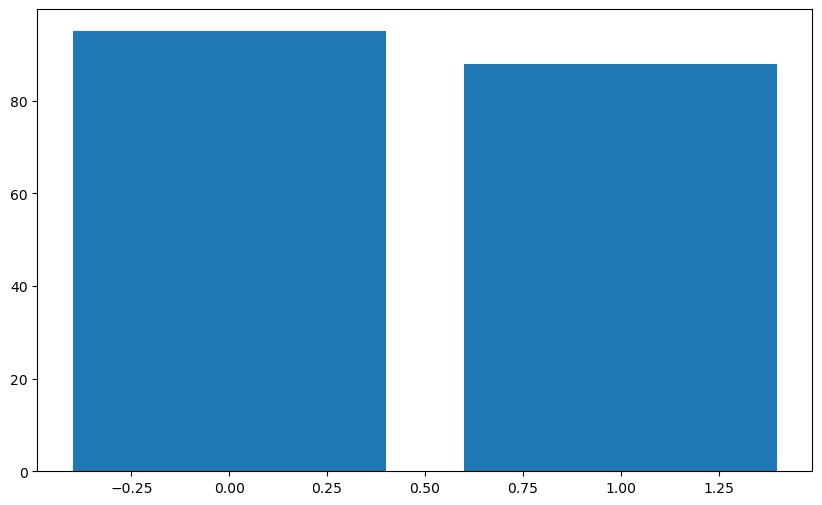

In [324]:
# グラフの大きさを設定
plt.figure(figsize =(10,6))
# 性別の数を確認してみる
plt.bar(tmp.index, tmp.count_sex)
plt.show()

### 41. pandasでグラフ表示する

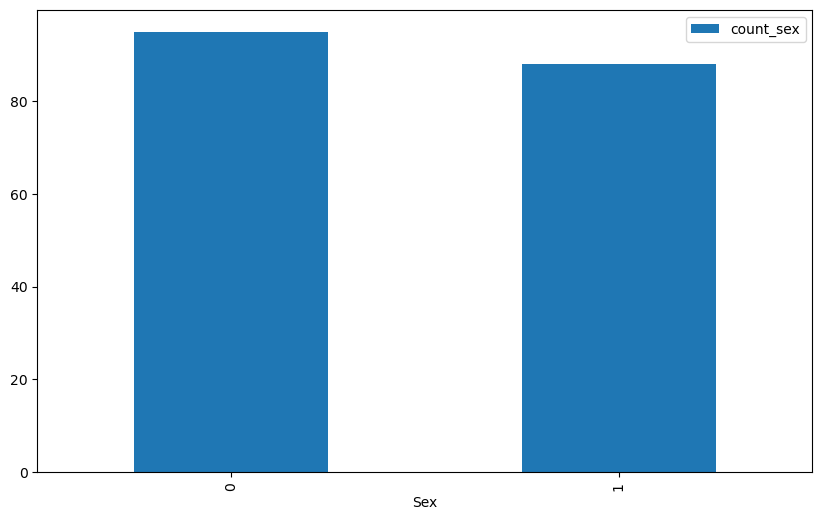

In [325]:
tmp.plot(kind = 'bar', figsize = (10,6))
plt.show()

### 42. Seabornで表示する


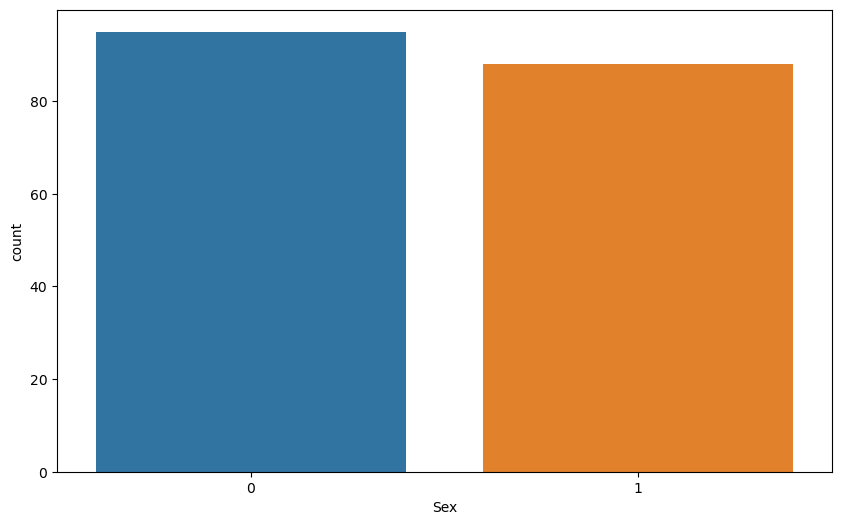

In [326]:
# グラフの大きさを設定
plt.figure(figsize=(10,6))
# 性別の数を確認してみる 
sns.countplot(data=df, x="Sex")
plt.show()

### 43. 階級別の人口を可視化する

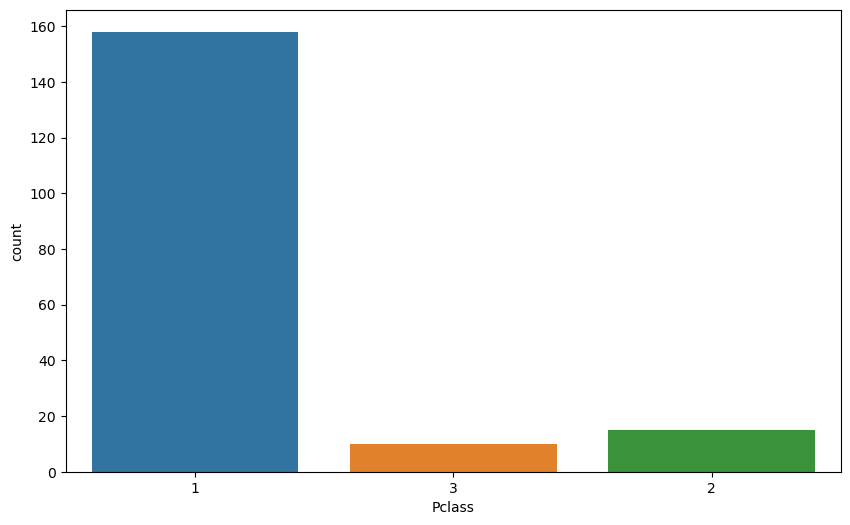

In [327]:
# グラフの大きさを設定
plt.figure(figsize=(10,6))
# 性別の数を確認してみる 
sns.countplot(data=df, x="Pclass")
plt.show()

### 44. 生存者・死者についての割合を可視化

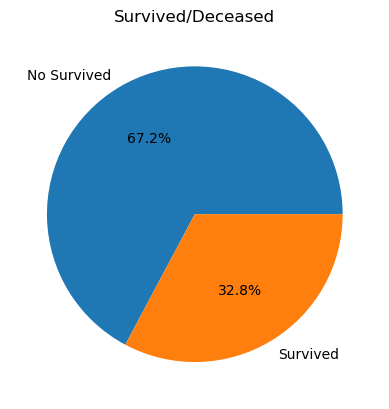

In [328]:
plt.pie(df["Survived"].value_counts(), labels=["No Survived", "Survived"], autopct="%1.1f%%")
plt.title("Survived/Deceased")
plt.show()

### 45. 階級と年齢での生存者について可視化する

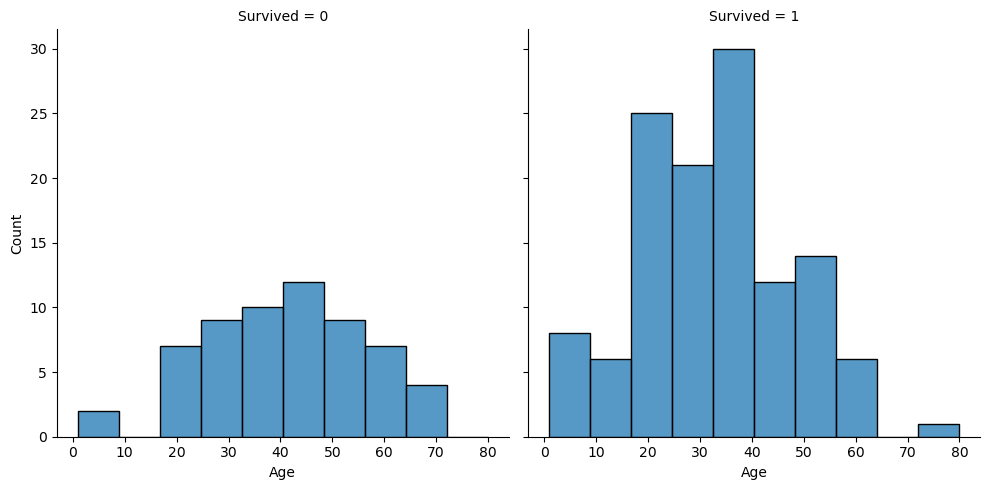

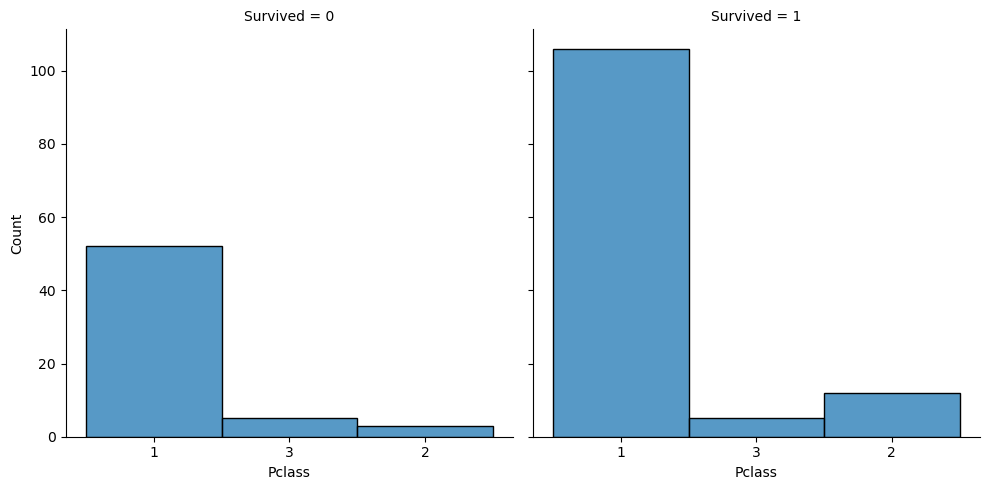

In [329]:
evaluation_features = ['Age', 'Pclass']

for feature in evaluation_features: 
    sns.displot(x=feature, data=df, col='Survived')
    plt.show()

## Pandasを使用してデータ解析を行い、機械学習を用いて生存者の予測を体験する

### 46.  統計量を確認

データセットでは数値タイプの特徴量の分布はどうなっているのか？

分布を調べることによって、トレーニングデータセットがどのように全体像を代表して表しているか分かります。
予測精度を上げる為にはトレーニングデータセットが母集団の性質を維持して居なければなりません。
正しく予測するには色々な工夫をして母集団をうまく表現出来るような標本が大事なのです。

In [330]:
df.describe()
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,35.674426,0.464481,0.475410,78.677596
std,247.052476,0.470725,15.643866,0.644159,0.754617,76.331117
min,2.000000,0.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,24.000000,0.000000,0.000000,30.000000
50%,457.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,80.000000,3.000000,4.000000,512.000000


- トレーニングデータセットの合計は889で、タイタニック号に搭乗した乗客の実際の数（2,224）の40％です。
- Survived は0または1の値を持つカテゴリカル特徴量です。
- トレーニングデータセットの約38％が実際のSurvived率の32％を代表して生き残りました。
- ほとんどの乗客（> 75％）は親または子供と一緒に旅行しなかった。
- 乗客のほぼ30％が兄弟姉妹や配偶者を乗せていました。
- 運賃は、一部の乗客(< 1%)だけ異常に高く、512ドル払っていました。
- 65歳から80歳までの高齢者はほとんどいませんでした（< 1％）。

### 47. カテゴリカル特徴量の分布は？

- nameはデータセット全体で一意です（count = unique = 889）
- 65％が男性（top=0、freq= 577 / count= 889）
- Embarkedは3つの値をとる可能性があるが、 ほとんどの乗客がS港をから乗船しました。(top= S)
- Ticket特徴量では、重複した値（ユニーク= 680 ）の割合（22％）が高い。

In [331]:
df.describe(include=['O'])

,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,183,183,183,183,183,183
unique,3,183,2,127,133,3
top,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,113760,G6,S
freq,158,1,95,4,4,116


### 48. データから考えられる仮説を立てる

これまでに行われたデータ分析に基づいて、以下の仮説を立てることができます。
機械学習の手段を考える前に、これらの仮説をさらに検証する必要があるかもしれません。

#### 相関関係
「Survived」を予測したい（0: 亡くなった, 1: 生存した）ので、各特徴量がどのように「Survived」に相関しているかを知りたいと思っています。プロジェクトの早い段階でこの作業を行い、プロジェクトの後半でモデル化された相関関係と仮説で考えた相関関係を一致させたいと考えています。

#### 修正

重複率（22％）が高く、TicketとSurvivedの間に相関がない可能性があるため、Ticket特徴量は分析から除外される可能性があります。
Survivedに寄与しないため、PassengerIdはトレーニングデータセットから削除される可能性があります。
nameの特徴量は比較的非標準であり、Survivedに直接貢献しない可能性があります。

#### 作成
ParchとSibSpに基づいてFamilyという新しい特徴量を作成し、家族の総数を取得したい場合があります。
name特徴量を使用して、Titleを新しい特徴量として抽出すると良いかも。
Age 特徴量ではある程度の幅をで表した、新しい特徴量を作成したい場合があります。これは、連続的な数値的特徴量を順序尺度のカテゴリカル特徴量に変えることで扱いやすくするためです。
分析に役立つ場合は、Ageと同じようにFareの範囲を特徴量として作成することもできます。

### 予測するのに重要そうな特徴量

また、当時の状況を鑑みると、以下の事柄を仮説に追加するかもしれません。

女性（性別=女性）は生存していた可能性が高い。
子供（年齢<？）は生存していた可能性が高い。
上位クラスの乗客（Pclass = 1）は生き残った可能性が高い。

### 49. 特徴量の相関を解析する

見立てと仮説の一部を確認するために、特徴量のSurvivedとの相関関係を分析します。この段階では空の値を持たない特徴量に対してのみ行うことができます。また、カテゴリ（性別）、順序（Pclass）または離散（SibSp、Parch）タイプの特徴量に対してのみ行うことが適切です。

-   Pclass<br>Pclass =1 とSurvivedの間に有意な相関（> 0.5）が観察されました。予想した通りだったので、この特徴量をモデルに含めることにしました。
- 性別<br>女性のSurvived率が74％で非常に高いという仮説が正しいことが確認できました。
- SibSpとParch<br>これらの特徴は、特定の値では無相関です。これらの個々の特徴量から新しい特徴量または特徴量のセットを作ることが最善の策でしょう。

In [332]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
1,2,0.800000
0,1,0.670886
2,3,0.500000


In [333]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
1,1,0.931818
0,0,0.431579


In [334]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
2,2,0.833333
1,1,0.734375
3,3,0.666667
0,0,0.627273


In [335]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
2,2,0.739130
1,1,0.702703
0,0,0.655738
3,4,0.000000


### 50 数値特徴量の相関を可視化する

数値特徴量とSurvived(統計学的に言うと応答変数)との相関を理解することから始めましょう。

ヒストグラムはAgeのような連続的な数値変数を分析するのに便利で、一定値毎での区切りや範囲が有用であるパターンを特定するのに役立ちます。

>ヒストグラムについて説明しておくと、横軸は階級（ある一定の数値で区切ったもの）、縦軸に度数（各階級に属する数値の数）、で表した縦棒グラフです。見ればなんとなく分かって頂けるかと思います。

ヒストグラムは、自動的に定義された階級の幅を使用した標本の分布を示すことができます。これは特定の階級に関する質問に答えるのに役立ちます（幼児の生存率はより良いか？）

>ヒストグラムにおけるy軸は、標本または乗客の数を表すことに注意してください。

観察

幼児（年齢= 4歳）は高い生存率を示した。
最も年老いた乗客（年齢= 80）が生き残った。
15-25歳の多数が生き残れなかった。
ほとんどの乗客は15-35歳の範囲にある。


結論

この単純な分析により仮説が正しいと確認され、後に続く分析で用いることができます。

モデルトレーニングでageを考慮する必要があります。
null値のageを補完する。
age特徴量ではある程度の幅で表された新しい特徴量を作成する。

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


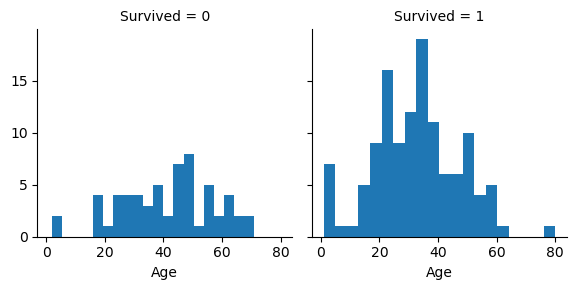

In [336]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### 51. 数値と順序尺度の特徴量の相関
1つのプロットを使用して相関を識別する複数の特徴量を組み合わせることができます。 これは数値とカテゴリカル特徴量を用いて行うことができます。

観察

Pclass = 3 のほとんどの乗客は生き残れなかった。
Pclass = 2 およびPclass = 3の幼児の乗客はほとんどが生き残った。 仮説【子供（年齢<？）は生存していた可能性が高い。】を実証しました。
Pclass = 1 のほとんどの乗客は生き残った。 仮説【上位クラスの乗客（Pclass = 1）は生き残った可能性が高い。】を実証しました。
Pclassは、乗客の年齢分布によって異なります。
結論

モデルトレーニングのためにPclassを考慮する。

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a fut

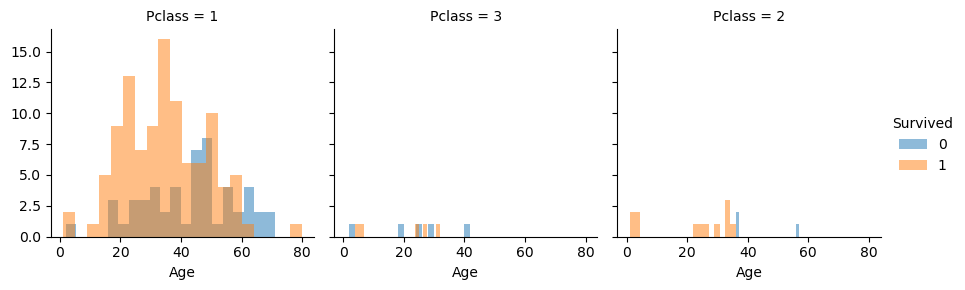

In [337]:
grid = sns.FacetGrid(df, col='Pclass', hue='Survived')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### 52. カテゴリカル特徴量の相関
カテゴリカル特徴量と応答変数(Survived)を関係を分析してみましょう。これは、数値の値を持つカテゴリカル特徴量と数値特徴量に対して行うことが出来ます。

観察

女性の乗客は男性よりもはるかに良好な生存率を示した。仮説【女性（性別=女性）は生存していた可能性が高い。】を実証しました。
例外的にEmbarked = C　では男性の生存率が高い。 これは、PclassとEmbarkedとの間の相関性であり、Pclassの影響が高く、必ずしもEmbarkedとSurvivedの間の直接的な相関関係とは言えない。
C、Q港でPclass = 2と比較した場合、男性はPclass = 3でより良い生存率を示した。 仮説【Survived または他の重要な特徴量と相関する可能性があるため、Embarked の欠損値も補完する必要があるかもしれません。】。
乗船港は、Pclass = 3および男性乗客の生存率が異なる。 仮説【各特徴量がどのように「Survived」に相関しているかを知りたい】。
結論

モデルトレーニングにSex特徴量を追加する。
モデルトレーニングにEmbarked特徴量を補完して追加する。

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.

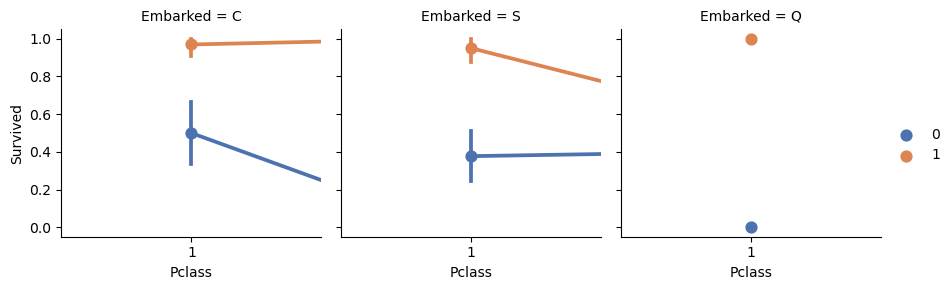

In [338]:
grid = sns.FacetGrid(df, col='Embarked')
#grid = sns.FacetGrid(df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### 53. カテゴリカル特徴量と数値特徴量の相関
また、（数値以外の値を持つ）カテゴリカル特徴量と数値特徴量を関連付けることもできます。 今回は、Embarked（カテゴリカルで非数値）、性別（カテゴリカルで非数値）、運賃（数値で連続値）、生存（カテゴリカルで数値）の間での相関を分析することができます。

観察

より高い運賃を支払う乗客はより良い生存率を示した。 仮説【Fareの範囲を特徴量として作成】。
乗船港は生存率と相関する。
結論

Fare特徴量のバンディング(一定の区間で区切ってカテゴリカルにする)を検討する。

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, 

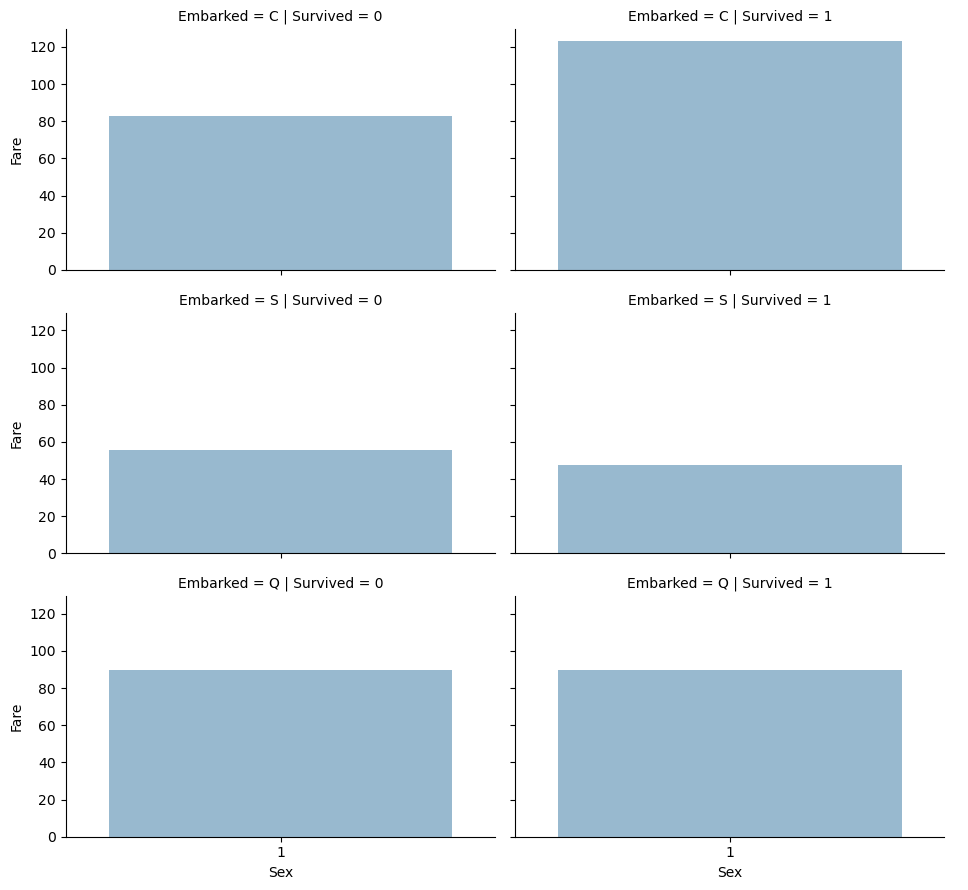

In [339]:
grid = sns.FacetGrid(df, row='Embarked', col='Survived',  aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## データラングリング

これまで、データセットと問題要件に関するいくつかの仮説と結論を集めました。 これまでは、単一の特徴量や値を変更してこれらに到達する必要はありませんでしたが、これからは結論と仮説を実行して、特徴量を補完したり修正したり作成したしていきましょう。

### 54. 特徴量を削除することで修正する
特徴量を削除することで、データポイントの数が減少し、分析をより楽にすることができます。

仮説と結論に基づいて、CabinとTicketの特徴量を削除しましょう。

該当する項目では、訓練データセットとテストデータセットの両方で操作を実行して、一貫性を保ちます。

In [340]:
print("Before", df.shape)
df = df.drop(['Ticket', 'Cabin'], axis=1)
df.shape

Before (183, 12)


(183, 10)

### 55. 既存のものから新しい特徴量を作成する
NameとPassengerIdを削除する前に、NameからTitle(肩書)を抽出し、TitleとSurvivedの相関関係を調べたいと思います。

次のコードでは、正規表現を使用してTitleを抽出します。 正規表現パターン (\w+\.)は、Name特徴量内のドット文字で終わる最初の単語と一致します。 expand = Falseフラグはパターンにマッチしたグループが１つの場合、Series(対象がSeriesのとき)かIndex(対象がIndexのとき)を返し、複数マッチした場合はDataframeを返します。デフォルトではTrueになっており、この場合は常にDataframeを返します。

観察

Title、年齢、生存率をプロットすると、次のような観察結果が得られます。

ほとんどのTitleは、年齢層を正確に区別します。 例：Master の年齢平均は5歳です。
Title年齢層の生存率はわずかに異なります。
一部のTitleはほとんどが生き残った（Mme、Lady、Sir）か、そうでなかった（Don、Rev、Jonkheer）。
結論

モデルトレーニングのために新しいタイトル特徴量を留め置くことに決めました。

In [341]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df['Title'], df['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,1,0
Countess,0,1
Dr,2,1
Lady,0,1
Major,2,0
Master,7,0
Miss,0,44
Mlle,0,2


多くのTitleをより一般的な名前に置き換えることも、「Rare」として分類することもできます。

In [342]:
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,1.000000
1,Miss,0.934783
2,Mr,0.370370
3,Mrs,0.923077
4,Rare,0.700000


カテゴリカルなタイトルを序数に変換することができます。

In [343]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

df['Title'] = df['Title'].map(title_mapping)
df['Title'] = df['Title'].fillna(0)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.0,C,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.0,S,3
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,52.0,S,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,17.0,S,2
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,27.0,S,2


これで、トレーニングとテストのデータセットからNameを安全に削除できます。 また、トレーニングデータセットにPassengerIdは必要ありません。生き残ったかどうかという問題とはどう考えても関係ないですよね。

In [344]:
df = df.drop(['Name', 'PassengerId'], axis=1)
df.shape

(183, 9)

## カテゴリカル特徴量の変換
文字列を含む特徴量を数値に変換できます。 この操作は、ほとんどのモデルアルゴリズムで必要で、特徴量の補完を成し遂げることに貢献してくれます。
Sex特徴量を、女性= 1、男性= 0の性別という新しい特徴量に変換してみましょう。

# 連続的数値の特徴量を補完する

今度は、欠損値またはnull値を持つ特徴量を、その欠損値を推定して補完する必要があります。まず、age特徴量でこれを行います。
数値連続的特徴量を補完するのに、ここでは3つの方法が考えられます。
簡単な方法は、平均と標準偏差の間の乱数を生成することです。

欠損値を推測するより正確な方法は、他の相関する特徴量を使用することです。今回のケースでは、年齢、性別、およびPclassの間の相関を記録する。 PclassとGenderの特徴量の組み合わせのセット全体でageの中央値を使用してAgeの値を推測します。Pclass = 1、Gender = 0、Pclass = 1、Gender = 1などの中間の年齢などなど。

方法1と2を組み合わせる。中央値に基づいて年齢値を推測する代わりに、PclassとGenderの組み合わせのセットに基づいて、平均と標準偏差の間になる乱数を使用する。

方法1と3はランダムノイズをモデルに導入することになり、複数回の実行結果が異なる可能性があります。よって方法2を優先します。

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a fut

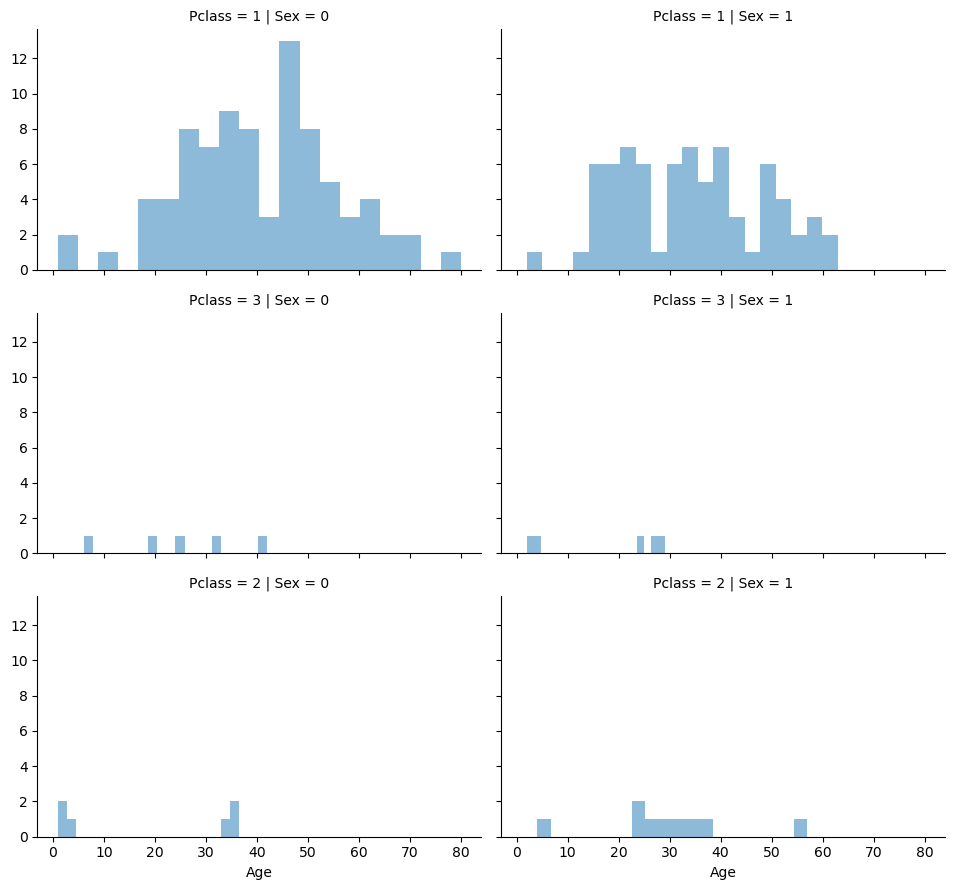

In [345]:
grid = sns.FacetGrid(df, row='Pclass', col='Sex', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Pclass x Genderの組み合わせに基づいて推測されたAge値を格納する為の、空の配列を準備することから始めましょう。

In [346]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

今度は、Sex（0または1）とPclass（1,2,3）を繰り返し、6つの組み合わせのAgeの推測値を計算します。

In [359]:
df['Sex'] = df['Sex'].astype(int)
df['Pclass'] = df['Pclass'].astype(int)
for i in range(0, 2):
    for j in range(0, 3):
        guess_df = df[(df['Sex'] == i) & \
                              (df['Pclass'] == j+1)]['Age'].dropna()

        age_guess = guess_df.median()
        # Convert random age float to nearest .5 age
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

for i in range(0, 2):
    for j in range(0, 3):
        df.loc[ (df.Age.isnull()) & (df.Sex == i) & (df.Pclass == j+1),\
                'Age'] = guess_ages[i,j]

df['Age'] = df['Age'].astype(int)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
1,1,1,1,38,1,0,71.0,C,3
3,1,1,1,35,1,0,53.0,S,3
6,0,1,0,54,0,0,52.0,S,1
10,1,3,1,4,1,1,17.0,S,2
11,1,1,1,58,0,0,27.0,S,2


Ageの区間(Band)を作成し、Survivedとの相関を見てみましょう。

In [361]:
df['AgeBand'] = pd.cut(df['Age'], 5)
df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.875000
1,"(16.0, 32.0]",0.741935
2,"(32.0, 48.0]",0.656250
3,"(48.0, 64.0]",0.555556
4,"(64.0, 80.0]",0.200000


これらの区間に基づいて年齢を序数に置き換えましょう。

In [362]:
df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[ df['Age'] > 64, 'Age'] = 4

In [363]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
1,1,1,1,2,1,0,71.0,C,3,"(32.0, 48.0]"
3,1,1,1,2,1,0,53.0,S,3,"(32.0, 48.0]"
6,0,1,0,3,0,0,52.0,S,1,"(48.0, 64.0]"
10,1,3,1,0,1,1,17.0,S,2,"(-0.08, 16.0]"
11,1,1,1,3,0,0,27.0,S,2,"(48.0, 64.0]"


AgeBand特徴量を削除します。

In [364]:
df = df.drop(['AgeBand'], axis=1)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
1,1,1,1,2,1,0,71.0,C,3
3,1,1,1,2,1,0,53.0,S,3
6,0,1,0,3,0,0,52.0,S,1
10,1,3,1,0,1,1,17.0,S,2
11,1,1,1,3,0,0,27.0,S,2


## 既存の特徴量を組み合わせて新しい特徴量を作成する

ParchとSibSpを組み合わせてFamilySizeとして新しい特徴量を作成できます。 これにより、データセットからParchとSibSpを削除できます。

In [365]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
4,5,1.000000
3,4,0.777778
1,2,0.721311
2,3,0.714286
0,1,0.607595
5,6,0.500000


In [366]:
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

In [367]:
df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.721154
1,1,0.607595


In [368]:
df = df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
1,1,1,1,2,71.0,C,3,0
3,1,1,1,2,53.0,S,3,0
6,0,1,0,3,52.0,S,1,1
10,1,3,1,0,17.0,S,2,0
11,1,1,1,3,27.0,S,2,1


PclassとAgeを組み合わせた人工的な特徴を作成することもできます。

In [369]:
df['Age*Class'] = df.Age * df.Pclass

df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
1,2,2,1
3,2,2,1
6,3,3,1
10,0,0,3
11,3,3,1
21,4,2,2
23,1,1,1
27,1,1,1
52,3,3,1
54,4,4,1


## カテゴリカル特徴量を補完する

Embarked特徴量は、乗船港に基づいてS、Q、Cの値を取ります。 トレーニングデータセットには2つの欠損値がありますが、今回は最も一般的な出現で埋めることにします。

In [370]:
freq_port = df.Embarked.dropna().mode()[0]
freq_port

'S'

In [371]:
df['Embarked'] = df['Embarked'].fillna(freq_port)

df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.738462
2,S,0.637931
1,Q,0.500000


## カテゴリカル特徴量を数値に変換する

欠損値を補完したので、Embarked特徴量を数値に変換出来るようになりました。

In [372]:
df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [373]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
1,1,1,1,2,71.0,1,3,0,2
3,1,1,1,2,53.0,0,3,0,2
6,0,1,0,3,52.0,0,1,1,3
10,1,3,1,0,17.0,0,2,0,0
11,1,1,1,3,27.0,0,2,1,3


# ここまでの内容

タイタニック号の水難事故である人が生き残るかどうかを正確に判別できるような機械学習モデルを作るべく、訓練データの傾向や歴史的な事実を用いて仮説を立て、それに基づいて特徴量の作成など、様々な操作を行ってきました。ここからはいよいよ実際にscikit-learnを使って機械学習モデルの作成に入ります。

## モデルを作って予測する

ついに長きに渡った前処理を終えて、結果を予測させることができるようになりました。ここでは、その使いやすさで絶大な人気を誇る機械学習ライブラリのscikit-learnを使うことになります。
この段階では、どんなアルゴリズムを使うか考えていくのですが、画像分類や異常検知などの特殊なケースでない場合は、取り敢えず実際にアルゴリズムに掛けてみて精度がいいものを採用する形になります。
scikit-learnの開発チームが、どのような場合にどのようなアルゴリズムを用いるとよいかということを纏めた画像が以下の図です。大体どのシチュエーションでどのアルゴリズムを用いるのか、把握しておきましょう。


## scikit-learnとは
[scikit-learn（サイキット・ラーン）](https://scikit-learn.org/stable/)はPython用の機械学習ライブラリです。scikit-learnはオープンソースで公開されており、個人・商用問わず、誰でも無料で利用することが出来ます。また、教師あり学習、教師なし学習に関するアルゴリズム(サポートベクターマシン、ランダムフォレスト、回帰、クラスタリングなど)が一通り利用出来る上、サンプルのデータセット（トイデータセットと呼びます）が豊富に揃っています。

そのためscikit-learnを用いるとすぐさま機械学習プログラミングを試すことが可能です。※より詳しい内容に関しては、公式サイト(英語)に記載されておりますので、scikit-learnに実装されている関数が出てきた際には、リファレンスとして読む事をオススメ致します。

なぜscikit-learnを学ぶのか

なぜPythonを用いて機械学習を活用する際に、scikit-learnを学ぶのでしょうか。それはscikit-learnは、Pythonで(統計的)機械学習プログラミングを行う場合、世界的にもデファクトスタンダードになっているからです。scikit-learnは無料で利用する事が出来ますので、機械学習を扱うのであればしっかりと使いこなせるようにしましょう。

以下は今回用いているアルゴリズムの一覧です。

- Logistic Regression
    - ロジスティック回帰。回帰とついてますが、分類もできます。古くから用いられている伝統的なアルゴリズムです。計算量が少なく済み、モデルの更新が素早く行えます。しかし、複雑な問題では精度が落ちてしまうことが多いです。

- KNN or k-Nearest Neighbors
    - KNNまたはk近傍法。ざっくり言うと、予測したいモノとn次元空間内で一番近いモノを見ることで結果を予測しています。

- Support Vector Machines
    - SVM。割と早い計算速度でありながら、複雑な問題にも対処できる可能性があります。

- Naive Bayes classifier
    - ナイーブベイズまたは単純ベイズ分類器。ベイズ統計の理論を用いたアルゴリズムです。スパムメールの検出などで活躍します。

- Decision Tree
    - 決定木。その特徴はなんといっても予測結果の解釈が容易だということです。アルゴリズムがどういうときにどういう結果になると予測するのか、その原理が明快に出てきます。

- Random Forest
    - ランダムフォレスト。バギングと決定木を組み合わせて一般化したものです。決定木よりも高い精度になる場合が多いですが、結果の解釈性は失われます。最近はこのランダムフォレストがKaggleで大人気です。
    - 詳しくは[ここ](https://qiita.com/3000manJPY/items/ef7495960f472ec14377)
- Perceptron
    - パーセプトロン。流行のディープラーニングの元になったアルゴリズムです。正直あんまり使われません。
    - 詳しくは[ここ](https://rightcode.co.jp/blog/information-technology/simple-perceptron)
- Artificial neural network
    - ニューラルネットワーク。人間の脳の機能をヒントに作られたアルゴリズムです。ディープラーニングで有名です。画像認識など、線形分離不能な問題に対して高い性能を発揮します。
    - 詳しくは[ここ](https://www.databricks.com/jp/glossary/artificial-neural-network)

以下簡単な解説ですが仕組みをきちんと理解しようと思うとそれなりに骨が折れます。
ちょっと理論はまだ手をつける予定がないが、強力と噂のアルゴリズムを試してみたい。という方は、仕組みを気にせず読み進めてください。

## Logistic Regression
ロジスティック回帰(logistice regression)は出力変数が1もしくは0の2値になる２値分類を予測する手法です。
具体的には任意の値を０から１に置き換えるシグモイド関数を用いて、与えられたデータから2つに分けます。
ロジスティック回帰は、線形分類問題と二値分類問題に対する分類モデルで、2つのグループに分けたい問題(線形分離可能な問題)にロジスティック回帰を活用できます。

## k-Nearest Neighbors

KNN(K Nearest Neighbor)。クラス判別用の手法。
学習データをベクトル空間上にプロットしておき、未知のデータが得られたら、そこから距離が近い順に任意のK個を取得し、多数決でデータが属するクラスを推定する。
例えば下図の場合、クラス判別の流れは以下となる。
- １　既知のデータ(学習データ)を黄色と紫の丸としてプロットしておく。
- ２　Kの数を決めておく。K=3とか。
- ３　未知のデータとして赤い星が得られたら、近い点から３つ取得する。
- ４　その３つのクラスの多数決で、属するクラスを推定。
今回は、未知の赤い星はClass Bに属すると推定する。

![](./utils/knn.webp)
<br>※Kの数次第で結果が変わるので注意。K=6にすると、赤い星はClass Aと判定される。

## Support Vector Machines

まず、アルゴリズムの名前にも出てくるSupport Vectorとは、データを分割する直線に最も近いデータ点の事です。
SVMでは、このサポートベクターが大きな役割を果たします。
また、サポートベクターを定めてこのような分割線が決まれば、あとはコレより上にあるか下にあるかで、どのクラスに属しているかの予測が出来るようになるわけです。<br>
![](./utils/svm.jpeg)


## ベイズの定理
機械学習のタスクでは、データセットが与えられたときに、それをもとにした推定がいくつかある中で、どの推定が最もらしいかということがよく問題になります。

例えば分類タスクでは、そのデータ点(サンプル)がどれに分類されるのかというのが、ここでいう推定ということになります。

このような、どの推定が最もらしいか判断するときに使えるのが、ベイズの定理と呼ばれる定理です。

P(H|D) = P(D|H)P(H) / P(D)

- P(H|D)
    - データD(結果)が与えられたときの、そのデータ(結果)に対する原因の推定Hが正しい確率。 (事後確率と呼ばれる。)

- P(D|H)
    - 原因の推定Hが正しいとしたときの、データD(結果)の確率。

- P(H)
    - データ(結果)に関係なく、原因の推定Hが正しい確率。 (推定Hの事前確率と呼ばれる。)

- P(D)
    - 原因の推定に関係ない、データD(結果)の確率。 (データDの事前確率と呼ばれる。)
結果の確率(事前確率、データからわかる) P(H)
, P(D)
, P(D|H)
 がわかっていれば、その結果となった原因の確率(事後確率) P(H|D)
 がわかります。 つまり、ある種の結果であるデータが与えられれば、そのデータから計算あるいは予想できる量を用いて、その結果となった原因の確率値が計算できるということになります。

こうして各原因の推定に対してそれぞれ確率(事後確率) P(H|D)
 を計算すれば、その値が最も高いものが、与えられたデータ(結果)において最も確からしい原因の推定結果、ということになります。

例えば、 ある街で、火事が起こる確率がP(Fire)=0.01
 で、煙が上がっているのを見る確率がP(Smoke)=0.1
 だとします。また火事の90%で煙が上るとすると、(P(Smoke|Fire)=0.9)
 煙が見えたときに実際にそれが火事が原因である事後確率は、ベイズの定理より
 

P(Fire|Smoke) = P(Fire)P(Smoke|Fire) / P(Smoke)
<br>=0.01 * 0.9 / 0.1 = 0.09 = 9 
ということになります。

煙が見えた時に火事が起こっている(家事が煙の原因である)確率の推定結果
P(Fire|Smoke) = 9% の確率で火事が起きている
P(Fire|Smoke) = 91% の確率で起きていない

ベイズの定理をもとにしたのがNaive Bayesアルゴリズムであり、以下のような特徴を持ちます。

- データが与えられたときの全ての推定の確率を計算し、最も確率の高いものを推定結果として出力
- 非常にシンプルだが、現実世界の多くの複雑な問題に対してうまく機能
- CPUとメモリに関してリソースが限られている場合に使用でき、さらにトレーニング時間が重要である場合、非常に迅速にトレーニングできて便利
- データの特徴量は独立で、互いに相関がないと仮定しており、各特徴量が独立に推定結果に影響するため、とても強い仮定において実データでは成り立たないこともある
- 強い仮定(制約)にもかかわらず、仮定が成り立たないであろう実データでも、驚くほどよい結果を出す
- その結果が、他のより複雑なアルゴリズムを越えることも多々ある

## データを読み込ませる準備

In [380]:
X_train = df.drop("Survived", axis=1)
Y_train = df["Survived"]

まずはscikit-learnに読み込ませるために、訓練データを用意します。以下のことに注意しましょう。
- X_trainには応答変数（答えとなる特徴量）を除いた予測変数（応答変数を予測するために使う特徴量のこと）を入れる。
- Y_trainには応答変数のみを入れる。


ここでは、取り敢えず大まかな流れを把握するということで、この予測精度を実際の予測精度の推定値としていますが、ホントはよくありません。訓練データを使って学習したモデルで訓練データを使って予測させるのですから、実際の予測精度よりも良い値が一般的に出てきます。さらに、それはモデルが複雑であるほど大きな差異となり、あんまり複雑にしすぎると、むしろ過剰適合となり、実際の精度は下がってしまいます。
このような自体を防ぐため、一般的に交差検証という手法が用いられます。興味のある方は調べてみてください。

## ロジスティック回帰

In [385]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0,max_iter=200)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_train)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.23

どうですか？簡単そうだと思えるのではないでしょうか？
ロジスティック回帰を使用して、仮説を検証できます。これは、決定関数内の特徴量の係数を計算することによって行うことができます。
正の係数は応答の対数オッズを増加させ（確率を増加させる）、負の係数は応答の対数オッズを減少させる（確率を減少させる）ことを表します。
ざっくり言うと、対数オッズの絶対値が大きいほど予測に有用な特徴量だということを表します。

- 性別が最も高い正の係数で、性別の価値が増加する（男性：0〜女性：1）ことを意味します。
- 逆にPclassが増加すると、Survived = 1の確率が最も低下します。
- Age * Classは、Survivedと2番目に高い負の相関関係を持つため、モデル化するのに適した人工的な特徴量だと言えそうです。
- 次に、タイトルが2番目に高い正の相関関係になります

In [387]:
coeff_df = pd.DataFrame(df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,1.945718
5,Title,0.493839
4,Embarked,0.174273
6,IsAlone,0.150912
3,Fare,0.001716
2,Age,-0.145712
0,Pclass,-0.283453
7,Age*Class,-0.370043


## SVM

次に、SVM（サポートベクターマシン）を使った予測モデルの作成方法を見て行きます。SVMは一般的にロジスティック回帰よりも良い精度が出ることが多いです。

In [393]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC(max_iter=500)
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_train)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

67.21

## k近傍法またはKNN

次はk近傍法またはKNNはノンパラメトリックの分類アルゴリズムです。

In [395]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_train)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

81.97

## 単純ベイズ分類器またはナイーブベイズ分類器

In [396]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_train)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.69

## パーセプトロン

パーセプトロンは教師ありバイナリ分類器です。留意して欲しい点は、パーセプトロンは線形予測関数の組み合わせということと、オンライン学習が可能だという点です

In [400]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_train)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

69.95

## 決定木

次に、決定木を見て行きます。
決定木は以下の図のように予測変数がどのような時に応答変数がどうなるかということを考えるモデルです。一般的に精度が高くなることが多いですが、過剰適合しやすいという欠点があります。

In [402]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_train)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

97.27

Pythonのライブラリgraphvizを用いることで決定木の可視化を行ってみます

In [405]:
!pip install graphviz

[Text(0.6988031914893617, 0.9666666666666667, 'Embarked <= 1.5\ngini = 0.441\nsamples = 183\nvalue = [60, 123]\nclass = y[1]'),
 Text(0.5305851063829787, 0.9, 'IsAlone <= 2.5\ngini = 0.466\nsamples = 81\nvalue = [51, 30]\nclass = y[0]'),
 Text(0.35904255319148937, 0.8333333333333334, 'Age <= 15.5\ngini = 0.496\nsamples = 53\nvalue = [29, 24]\nclass = y[0]'),
 Text(0.3377659574468085, 0.7666666666666667, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = y[0]'),
 Text(0.3803191489361702, 0.7666666666666667, 'Age <= 27.5\ngini = 0.499\nsamples = 50\nvalue = [26, 24]\nclass = y[0]'),
 Text(0.3377659574468085, 0.7, 'Age <= 26.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]\nclass = y[1]'),
 Text(0.31648936170212766, 0.6333333333333333, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = y[1]'),
 Text(0.35904255319148937, 0.6333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = y[1]'),
 Text(0.4228723404255319, 0.7, 'Age <= 387.5\ngini = 0.487\nsamples = 43\nvalue = [25, 18]\nclass 

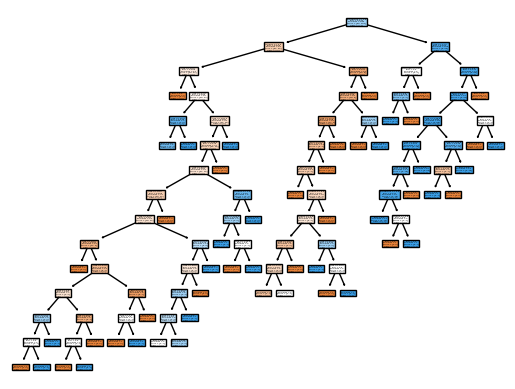

In [425]:
from sklearn.tree import plot_tree
plot_tree(decision_tree, feature_names=df.columns, class_names=True, filled=True)